In [1]:
import json, os
import argparse
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

from data_loader import load_data
from models.cnn_geo import CNN_geo

from test_codes import data, train, visualize
from utils import image
import geo_transform as tps
import CNNgeo_debug

# 1. Read configuration file

In [2]:
with open('overfit.json') as fp:
    config = json.load(fp)
split = 'val'

In [3]:
#data.synthesize_image_pair(config, split)

In [4]:
print(config['train'])

{'n_examples': 1, 'learning_rate': 0.0001, 'batch_size': 1, 'epochs': 200, 'print_step': 10}


In [5]:
print("backbone : ", config['backbone'])
print("n_examples : ", config['train']['n_examples'])
print("learning_rate : ", config['train']['learning_rate'])
print("batch_size : ", config['train']['batch_size'])
print("epoch num : ", config['train']['epochs'])

backbone :  prototypical_network
n_examples :  1
learning_rate :  0.0001
batch_size :  1
epoch num :  200


# 2. Train model on the config parameters

In [6]:
model = CNNgeo_debug.train(config)

train dataset amount : 1
val dataset amount : 1
start of epoch 1
Training loss (for one batch) at step 0: 0.5267517566680908
Epoch 1, Loss: 0.5267517566680908, Val Loss: 0.48221904039382935
end of epoch.
start of epoch 2
Training loss (for one batch) at step 0: 0.5015990138053894
Epoch 2, Loss: 0.5015990138053894, Val Loss: 0.4773034155368805
end of epoch.
start of epoch 3
Training loss (for one batch) at step 0: 0.5526953935623169
Epoch 3, Loss: 0.5526953935623169, Val Loss: 0.5809198021888733
end of epoch.
start of epoch 4
Training loss (for one batch) at step 0: 0.45975160598754883
Epoch 4, Loss: 0.45975160598754883, Val Loss: 0.44619449973106384
end of epoch.
start of epoch 5
Training loss (for one batch) at step 0: 0.47200414538383484
Epoch 5, Loss: 0.47200414538383484, Val Loss: 0.553024172782898
end of epoch.
start of epoch 6
Training loss (for one batch) at step 0: 0.42445802688598633
Epoch 6, Loss: 0.42445802688598633, Val Loss: 0.5307998657226562
end of epoch.
start of epoch 

Training loss (for one batch) at step 0: 0.4397232234477997
Epoch 53, Loss: 0.4397232234477997, Val Loss: 0.5458909273147583
end of epoch.
start of epoch 54
Training loss (for one batch) at step 0: 0.46390798687934875
Epoch 54, Loss: 0.46390798687934875, Val Loss: 0.48195579648017883
end of epoch.
start of epoch 55
Training loss (for one batch) at step 0: 0.564265251159668
Epoch 55, Loss: 0.564265251159668, Val Loss: 0.40944406390190125
end of epoch.
start of epoch 56
Training loss (for one batch) at step 0: 0.46031707525253296
Epoch 56, Loss: 0.46031707525253296, Val Loss: 0.45607107877731323
end of epoch.
start of epoch 57
Training loss (for one batch) at step 0: 0.45691412687301636
Epoch 57, Loss: 0.45691412687301636, Val Loss: 0.4581795334815979
end of epoch.
start of epoch 58
Training loss (for one batch) at step 0: 0.5016496181488037
Epoch 58, Loss: 0.5016496181488037, Val Loss: 0.5156579613685608
end of epoch.
start of epoch 59
Training loss (for one batch) at step 0: 0.44158840

Epoch 105, Loss: 0.4863106310367584, Val Loss: 0.39058127999305725
end of epoch.
start of epoch 106
Training loss (for one batch) at step 0: 0.5417704582214355
Epoch 106, Loss: 0.5417704582214355, Val Loss: 0.5576896071434021
end of epoch.
start of epoch 107
Training loss (for one batch) at step 0: 0.5161257386207581
Epoch 107, Loss: 0.5161257386207581, Val Loss: 0.505064070224762
end of epoch.
start of epoch 108
Training loss (for one batch) at step 0: 0.5638969540596008
Epoch 108, Loss: 0.5638969540596008, Val Loss: 0.4541715383529663
end of epoch.
start of epoch 109
Training loss (for one batch) at step 0: 0.5058631300926208
Epoch 109, Loss: 0.5058631300926208, Val Loss: 0.4868570566177368
end of epoch.
start of epoch 110
Training loss (for one batch) at step 0: 0.4758605360984802
Epoch 110, Loss: 0.4758605360984802, Val Loss: 0.455666184425354
end of epoch.
start of epoch 111
Training loss (for one batch) at step 0: 0.37851980328559875
Epoch 111, Loss: 0.37851980328559875, Val Loss

Training loss (for one batch) at step 0: 0.5290352702140808
Epoch 158, Loss: 0.5290352702140808, Val Loss: 0.49938488006591797
end of epoch.
start of epoch 159
Training loss (for one batch) at step 0: 0.47709518671035767
Epoch 159, Loss: 0.47709518671035767, Val Loss: 0.5175390243530273
end of epoch.
start of epoch 160
Training loss (for one batch) at step 0: 0.5431479215621948
Epoch 160, Loss: 0.5431479215621948, Val Loss: 0.4868827164173126
end of epoch.
start of epoch 161
Training loss (for one batch) at step 0: 0.5234887003898621
Epoch 161, Loss: 0.5234887003898621, Val Loss: 0.5122454762458801
end of epoch.
start of epoch 162
Training loss (for one batch) at step 0: 0.4653880000114441
Epoch 162, Loss: 0.4653880000114441, Val Loss: 0.5217132568359375
end of epoch.
start of epoch 163
Training loss (for one batch) at step 0: 0.529481053352356
Epoch 163, Loss: 0.529481053352356, Val Loss: 0.4826306998729706
end of epoch.
start of epoch 164
Training loss (for one batch) at step 0: 0.41

In [7]:
model.summary()

Model: "cnn_geo"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature__extractor (Feature_ multiple                  113600    
_________________________________________________________________
correlation_network (Correla multiple                  0         
_________________________________________________________________
spatial_transformer_regresso multiple                  875250    
Total params: 988,850
Trainable params: 988,146
Non-trainable params: 704
_________________________________________________________________


# 3. Debug codes

In [8]:
datasets = load_data(['train'], config)
ds = datasets['train'].batch(1)

train dataset amount : 1


In [9]:
for image_A, image_B, parameters in ds.take(1):
    image_A = image_A.numpy()
    image_B = image_B.numpy()
    parameters = parameters.numpy()
#image_B_hat = np.ones([1, 64, 64, 3])
pred, score = model(image_A, image_B)

In [10]:
print("parameter shape", pred.shape)
print("score shape", score.shape)
print(image_A.shape)

parameter shape (1, 9, 2)
score shape (1, 16, 16, 16, 16)
(1, 64, 64, 3)


## a. 모델은 이미지쌍(image A, image B)으로부터 모션 파라미터를 추정할 수 있는가?

### 반복 시행 1

compare gt : [[[-0.13043766 -0.18404832]
  [ 0.18106805  0.07970381]
  [-0.1278586   0.05054436]
  [-0.1395794   0.06519385]
  [-0.06439195  0.11532793]
  [-0.04426918  0.02836704]
  [ 0.0227592  -0.16686927]
  [ 0.05012674  0.07250895]
  [-0.11215343 -0.11619158]]] and 
 pred : [[[ 2.1380242e-03  4.4031805e-04]
  [-2.4255062e-03 -1.8939306e-03]
  [ 2.9904034e-04  4.8377463e-03]
  [-2.7184724e-04  2.0439231e-03]
  [-1.2282170e-03 -1.4591082e-05]
  [ 3.7083321e-04  1.3606061e-04]
  [-2.9373025e-03  7.0473994e-04]
  [-2.1467507e-03 -4.2891558e-03]
  [ 9.4065105e-04  5.0081674e-04]]]
loss : [0.10885546]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


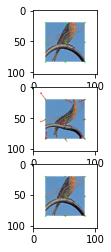

In [13]:
for image_A, image_B, parameters in ds.take(1):
    image_A = image_A.numpy()
    image_B = image_B.numpy()
    parameters = parameters.numpy()
pred, score = model(image_A, image_B)

print("compare gt : {} and \n pred : {}".format(parameters, pred))
loss = tf.reduce_sum(tf.keras.losses.MSE(pred, parameters), axis=1)
print("loss : {}".format(loss))

pred = pred.numpy()
image_C = list(map(lambda x : image.synthesize_image(x[0], x[1], (64, 64), bbox=None, pad_ratio=None),
                   zip(image_A.copy(), pred.copy())))    
image_C = np.array(image_C)
visualize.show_TPS_image([image_A, image_B, image_C], [np.ones_like(parameters), parameters, pred])    

pred1 = pred.copy()

### 반복 시행 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


compare gt : [[[-0.19677582 -0.08329554]
  [-0.1439197   0.13962507]
  [-0.10982686  0.10416474]
  [-0.17549983 -0.02944741]
  [ 0.1624023   0.18824215]
  [-0.141004    0.01149349]
  [ 0.06974025 -0.11064615]
  [-0.1312098  -0.11134019]
  [-0.0847158  -0.06765284]]] and 
 pred : [[[ 2.1380242e-03  4.4031805e-04]
  [-2.4255062e-03 -1.8939306e-03]
  [ 2.9904034e-04  4.8377463e-03]
  [-2.7184724e-04  2.0439231e-03]
  [-1.2282170e-03 -1.4591082e-05]
  [ 3.7083321e-04  1.3606061e-04]
  [-2.9373025e-03  7.0473994e-04]
  [-2.1467507e-03 -4.2891558e-03]
  [ 9.4065105e-04  5.0081674e-04]]]
loss : [0.14021416]


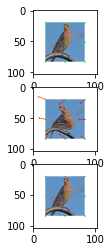

In [14]:
for image_A, image_B, parameters in ds.take(1):
    image_A = image_A.numpy()
    image_B = image_B.numpy()
    parameters = parameters.numpy()
pred, score = model(image_A, image_B)

print("compare gt : {} and \n pred : {}".format(parameters, pred))
loss = tf.reduce_sum(tf.keras.losses.MSE(pred, parameters), axis=1)
print("loss : {}".format(loss))

pred = pred.numpy()
image_C = list(map(lambda x : image.synthesize_image(x[0], x[1], (64, 64), bbox=None, pad_ratio=None),
                   zip(image_A.copy(), pred.copy())))    
image_C = np.array(image_C)
visualize.show_TPS_image([image_A, image_B, image_C], [np.ones_like(parameters), parameters, pred])    

pred2 = pred.copy()

### Garbage image B


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


compare gt : [[[-0.19677582 -0.08329554]
  [-0.1439197   0.13962507]
  [-0.10982686  0.10416474]
  [-0.17549983 -0.02944741]
  [ 0.1624023   0.18824215]
  [-0.141004    0.01149349]
  [ 0.06974025 -0.11064615]
  [-0.1312098  -0.11134019]
  [-0.0847158  -0.06765284]]] and 
 pred : [[[ 2.1380242e-03  4.4031805e-04]
  [-2.4255062e-03 -1.8939306e-03]
  [ 2.9904034e-04  4.8377463e-03]
  [-2.7184724e-04  2.0439231e-03]
  [-1.2282170e-03 -1.4591082e-05]
  [ 3.7083321e-04  1.3606061e-04]
  [-2.9373025e-03  7.0473994e-04]
  [-2.1467507e-03 -4.2891558e-03]
  [ 9.4065105e-04  5.0081674e-04]]]
loss : [0.14021416]


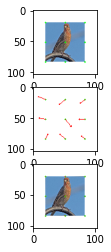

In [15]:
image_B = np.ones([1, 64, 64, 3])
pred, score = model(image_A, image_B)

print("compare gt : {} and \n pred : {}".format(parameters, pred))
loss = tf.reduce_sum(tf.keras.losses.MSE(pred, parameters), axis=1)
print("loss : {}".format(loss))

pred = pred.numpy()
image_C = list(map(lambda x : image.synthesize_image(x[0], x[1], (64, 64), bbox=None, pad_ratio=None),
                   zip(image_A.copy(), pred.copy())))    
image_C = np.array(image_C)
visualize.show_TPS_image([image_A, image_B, image_C], [np.ones_like(parameters), parameters, pred])    

pred3 = pred.copy()

In [ ]:
print(pred1, "\n", pred2, "\n", pred3)

In [ ]:
model.summary()

### 임의의 correlation을 입력했을 때 : 역시 같은 결과

In [ ]:
x = np.zeros([16, 16, 16, 16], np.float32)+1.0
y = np.random.uniform(low=0.89, high=1.0, size=[16, 16, 16, 16]).astype(np.float32)
model.layers[2](y)
model.layers[2](y)

In [18]:
x = np.ones([1, 16, 16, 16, 16]) # all correlations are one
y = model.layers[2](x)
print(y)

tf.Tensor(
[[ 2.1380242e-03  4.4031805e-04 -2.4255062e-03 -1.8939306e-03
   2.9904034e-04  4.8377463e-03 -2.7184724e-04  2.0439231e-03
  -1.2282170e-03 -1.4591082e-05  3.7083321e-04  1.3606061e-04
  -2.9373025e-03  7.0473994e-04 -2.1467507e-03 -4.2891558e-03
   9.4065105e-04  5.0081674e-04]], shape=(1, 18), dtype=float32)


In [ ]:
#y = np.random.uniform(low=0.89, high=1.0, size=[16, 16, 16, 16]).astype(np.float32)


In [20]:
x = np.random.normal(loc=0.5, scale=0.0, size=[1, 16, 16, 16, 16])

In [31]:
std_range = np.linspace(0, 1.0, 50)
print(std_range)

[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]


In [28]:
distances = []
for std in std_range:
    x = np.random.normal(loc=0.5, scale=std, size=[1, 16, 16, 16, 16])
    _y = model.layers[2](x)
    distance = np.square(np.sum(np.power((y - _y), 2)))
    distances.append(distance)   

[0.0, 0.0, 3.553997e-13, 1.7792567e-09, 2.6857334e-09, 4.7599505e-07, 1.7093558e-06, 2.9410621e-05, 2.276667e-05, 0.00014305983, 0.00041029844, 0.000775071, 0.000349852, 0.0006241798, 0.0016046868, 0.0019472252, 0.0112478845, 0.026991727, 0.009504217, 0.015219706, 0.054853193, 0.069531925, 0.07815356, 0.018589182, 0.04798104, 0.08692917, 0.3107897, 0.123597324, 0.16204292, 0.10677534, 0.46224642, 0.66187805, 1.017178, 0.31189275, 0.8824818, 0.82076305, 1.6510396, 0.69405794, 3.3005543, 2.6375868, 3.2665477, 0.85675687, 2.9508348, 12.105652, 9.054043, 6.9707637, 13.703121, 1.8836066, 13.178517, 12.026426]


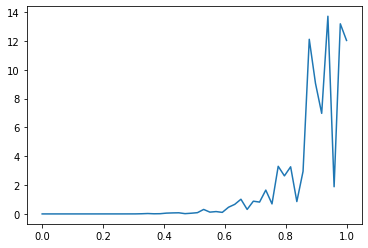

In [30]:
plt.plot(std_range, distances)
plt.show()

1. VGG16을 통한 correlations
2. 시각화 방식 개선
3. tentative penalty

## b. 특징추출기의 정상 동작 검증

### 동일 영상에 대한 correlation

In [11]:
for image_A, image_B, parameters in ds.take(1):
    image_A = image_A.numpy()
    image_B = image_B.numpy()
    parameters = parameters.numpy()
pred, score = model(image_A, image_A)

score = score.numpy()[0]
parameters = parameters[0]
image_A = image_A[0]
image_B = image_B[0]

print(score.shape, parameters.shape, image_A.shape)

(16, 16, 16, 16) (9, 2) (64, 64, 3)


In [12]:
def get_matching_grid_from_B(parameters, center_point):
    src_points = np.array([[0.0, 0.0], [0.5, 0.0], [1.0, 0.0],
                                   [0.0, 0.5], [0.5, 0.5], [1.0, 0.5],
                                   [0.0, 1.0], [0.5, 1.0], [1.0, 1.0]])

    dst_points = src_points +parameters

    theta = tps.tps_theta_from_points(src_points, dst_points, reduced=True)
    dshape = (64, 64)
    grid = tps.tps_grid(theta, dst_points, dshape)
    mapx, mapy = tps.tps_grid_to_remap(grid, (64, 64))
    points = np.concatenate([mapy[:,:,np.newaxis], mapx[:,:,np.newaxis]], axis=2)
    #print("points :", points)
    center_point = np.array(center_point)
    #print("grid center : ", center_point)
    center_point = center_point[np.newaxis, np.newaxis, :]
    distance = np.sum(np.power((points - center_point), 2), axis=2)
    #print("distance : ", distance)
    ri, ci = distance.argmin()//distance.shape[1], distance.argmin()%distance.shape[1]
    return (ri, ci)

In [ ]:
def score_test(grid_coord, score, parameters, images, grid_shape=(16,16)):
    image_A, image_B = images
    score = score[grid_coord[0], grid_coord[1]]
    H, W, C = image_A.shape
    grid_size = H/grid_shape[0], W/grid_shape[1]

    start_pix_h = int(grid_size[0]*grid_coord[0])
    end_pix_h = int(grid_size[0]*(1+grid_coord[0]))
    start_pix_w = int(grid_size[1]*grid_coord[1])
    end_pix_w = int(grid_size[1]*(1+grid_coord[1]))
    
    drawn_grid_image_A = image_A.copy()
    drawn_grid_image_A[start_pix_h:end_pix_h, start_pix_w:end_pix_w] = (0,0,0)   
    
    expected_drawn_grid_image_B = image_B.copy()
    grid_center_A = (int(start_pix_h+grid_size[0]/2), int(start_pix_w+grid_size[1]/2))
    grid_center_B = get_matching_grid_from_B(parameters, grid_center_A)
    start_pix_h = int(grid_center_B[0] - grid_size[0]/2)
    start_pix_w = int(grid_center_B[1] - grid_size[1]/2)
    end_pix_h = int(grid_center_B[0] + grid_size[0]/2)
    end_pix_w = int(grid_center_B[1] + grid_size[1]/2)
    expected_drawn_grid_image_B[start_pix_h:end_pix_h, start_pix_w:end_pix_w] = (0,0,0)
    
    drawn_grid_image_B = image_B.copy()
    max_correlation_grid_index = score.argmax()//score.shape[1], score.argmax()%score.shape[1]
    start_pix_h = int(grid_size[0]*max_correlation_grid_index[0])
    end_pix_h = int(grid_size[0]*(1+max_correlation_grid_index[0]))
    start_pix_w = int(grid_size[1]*max_correlation_grid_index[1])
    end_pix_w = int(grid_size[1]*(1+max_correlation_grid_index[1]))

    drawn_grid_image_B[start_pix_h:end_pix_h, start_pix_w:end_pix_w] = (0,0,0)
    
    print("top 10 correlation values in descending : ", np.sort(score.flatten())[::-1][:10])
    
    return drawn_grid_image_A, expected_drawn_grid_image_B, drawn_grid_image_B

In [ ]:
drawn_image_A, expected_drawn_grid_image_B, drawn_grid_image_B = score_test(grid_coord=(5,10), 
                                                                            score=score, 
                                                                            parameters=np.zeros([9,2]), 
                                                                            images=(image_A, image_A))

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.imshow(drawn_image_A)
ax2.imshow(expected_drawn_grid_image_B)
ax3.imshow(drawn_grid_image_B)

plt.show()

In [ ]:
drawn_image_A.shape
expected_drawn_grid_image_B.shape
drawn_grid_image_B.shape

### b.1 ) 동일한 사진의 경우

In [ ]:
for i in range(16):
    drawn_image_A, expected_drawn_grid_image_B, drawn_grid_image_B = score_test(grid_coord=(i,i), 
                                                                                score=score, 
                                                                                parameters=np.zeros([9,2]), 
                                                                                images=(image_A, image_A))   
    fig = plt.figure()

    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)

    ax1.imshow(drawn_image_A)
    ax2.imshow(expected_drawn_grid_image_B)
    ax3.imshow(drawn_grid_image_B)

    plt.show()

### b.2 ) 다른 사진의 경우

In [ ]:
for image_A, image_B, parameters in ds.take(1):
    image_A = image_A.numpy()
    image_B = image_B.numpy()
    parameters = parameters.numpy()
pred, score = model(image_A, image_A)

score = score.numpy()[0]
parameters = parameters[0]
image_A = image_A[0]
image_B = image_B[0]

print(score.shape, parameters.shape, image_A.shape)

In [ ]:
for i in range(16):
    drawn_image_A, expected_drawn_grid_image_B, drawn_grid_image_B = score_test(grid_coord=(i,i), 
                                                                                score=score, 
                                                                                parameters=parameters, 
                                                                                images=(image_A, image_B))   
    fig = plt.figure()

    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)

    ax1.imshow(drawn_image_A)
    ax2.imshow(expected_drawn_grid_image_B)
    ax3.imshow(drawn_grid_image_B)

    plt.show()


In [ ]:
from models.cnn_geo import CNN_geo
from data_loader import load_data
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
model = CNN_geo(config['backbone'])
ckpt_dir = os.path.join(
        'checkpoints', config['model_name'], config['exp_desc'])
ckpt = os.path.join(ckpt_dir, "{}-{}.h5".format(config['model_name'], str(config['train']['epochs'])))
model.load(ckpt)

In [ ]:
model.layers

In [ ]:
model.layers[2](np.ones([1, 16,16,16,16]))

In [ ]:
datasets = load_data(['train'], config)
ds = datasets['train'].batch(1)
for image_A, image_B, parameters in ds.take(1):
    image_A = image_A.numpy()
    image_B = image_B.numpy()
    parameters = parameters.numpy()

In [ ]:
image_A.shape, image_B.shape

x = model.layers[0](image_A)
y = model.layers[0](image_B)

In [ ]:
plt.imshow(image_A[0])

In [ ]:
plt.imshow(image_B[0])

In [ ]:
import tensorflow as tf

In [ ]:
score = model.layers[1](x, y)

In [ ]:
float_formatter = "{:.3f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

In [ ]:
print(np.max(score[0, 0,0]))

In [ ]:
print(score[0,0,0])

In [ ]:
parameters

In [ ]:
model.layers[2](score)

In [ ]:
vgg = tf.keras.applications.VGG16(weights='imagenet', input_shape=(64, 64, 3), include_top=False)

In [ ]:
model = tf.keras.Model(inputs=vgg.layers[0].input, outputs=vgg.layers[9].output)

In [ ]:
model.summary()